In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Display all columns
pd.set_option('display.max_columns', None)  # or pd.set_option('display.max_columns', number_of_columns)


In [2]:
#import the audio parquet
spotify_df = pd.read_parquet("../Data/my_spotify_data/Spotify Extended Streaming History/collated_spotify_audio.parquet")

#look at first couple rows
spotify_df.head(5)

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,audiobook_title,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2014-02-23T00:40:19Z,Windows 7 (6.1.7601; x64; SP1; S),436960,US,134.129.174.115,Fear of the Dark,Iron Maiden,Fear of the Dark,spotify:track:0PLUzbu0ST6IOSgtUknxWV,None,None,None,None,None,None,None,unknown,trackdone,False,False,False,NaN,False
1,2014-02-23T00:42:06Z,Windows 7 (6.1.7601; x64; SP1; S),107887,US,134.129.174.115,Kings And Queens,Thirty Seconds To Mars,This Is War,spotify:track:4sjLcE0GQ6urc4iUXsUPe9,None,None,None,None,None,None,None,trackdone,unknown,False,True,False,NaN,False
2,2014-02-23T00:45:42Z,Windows 7 (6.1.7601; x64; SP1; S),215533,US,134.129.174.115,Every Night,Imagine Dragons,Night Visions,spotify:track:3WQZfz5DLbO2vnJDWNxRBf,None,None,None,None,None,None,None,unknown,trackdone,False,False,False,NaN,False
3,2014-02-23T00:46:39Z,Windows 7 (6.1.7601; x64; SP1; S),57413,US,134.129.174.115,What You Wanted,OneRepublic,Native,spotify:track:4MCuoA53lZFj4EiBFYv1B2,None,None,None,None,None,None,None,trackdone,endplay,False,True,False,NaN,False
4,2014-02-23T04:02:00Z,Windows 7 (6.1.7601; x64; SP1; S),113067,US,134.129.174.115,What You Wanted,OneRepublic,Native,spotify:track:4MCuoA53lZFj4EiBFYv1B2,None,None,None,None,None,None,None,appload,endplay,False,True,False,NaN,False


In [3]:
#create a year column from the ts column
spotify_df["year"] = pd.to_datetime(spotify_df["ts"]).dt.year

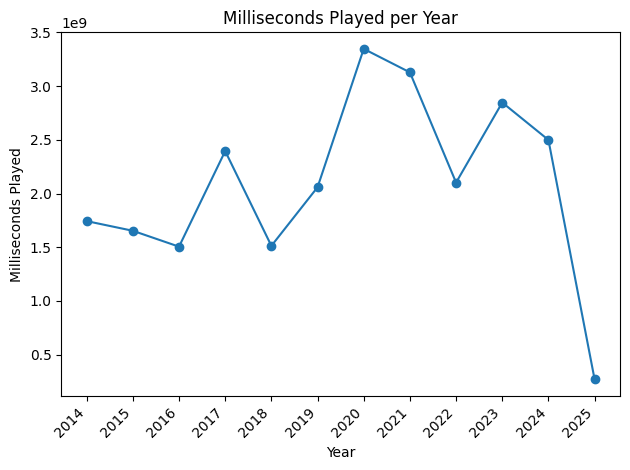

In [4]:
# Group by year and sum ms_played
yearly_ms_played = spotify_df.groupby(["year"])["ms_played"].sum()

# Create the plot
ax = yearly_ms_played.plot(marker = "o")

# Get the unique years from the index
years = yearly_ms_played.index.unique()

# Set the x-axis ticks and labels
ax.set_xticks(years)  # Set tick *locations*
ax.set_xticklabels(years, rotation=45, ha="right") # Set tick *labels* and rotate for readability

# Improve plot aesthetics (optional)
plt.xlabel("Year")
plt.ylabel("Milliseconds Played")
plt.title("Milliseconds Played per Year")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [25]:
# Convert 'ts' to datetime objects
spotify_df['ts'] = pd.to_datetime(spotify_df['ts'])

# Extract year, month, and day of year
spotify_df['month'] = spotify_df['ts'].dt.month
spotify_df['day_of_year'] = spotify_df['ts'].dt.dayofyear
spotify_df["day_of_month"] = spotify_df["ts"].dt.day

# Sort by 'ts' (important for cumulative sum)
spotify_df = spotify_df.sort_values('ts')

#create a smaller dataframe by day vs every single record
year_cum_df = spotify_df.groupby(["year","month","day_of_month","day_of_year"])["ms_played"].sum().reset_index()

In [26]:
#create cummulative sum
year_cum_df["cum_sum_played"] = year_cum_df.groupby(["year"])["ms_played"].cumsum()

#create day month string for viewing in graph
year_cum_df["month_day"] = year_cum_df['month'].astype(str) + '/' + year_cum_df['day_of_month'].astype(str)

#view first couple records
year_cum_df.head(5)

,year,month,day_of_month,day_of_year,ms_played,cum_sum_played,month_day
0,2014,2,23,54,1647488,1647488,2/23
1,2014,2,24,55,201530,1849018,2/24
2,2014,2,25,56,1710292,3559310,2/25
3,2014,2,26,57,3988725,7548035,2/26
4,2014,2,27,58,10319698,17867733,2/27


In [27]:
# Plot with Plotly
fig = px.line(
    year_cum_df, 
    x='day_of_year',  # x-axis is day of the year
    y='cum_sum_played', 
    color='year',      # Color lines by year (legend)
    title='Yearly Cumulative Sum of Milliseconds Played',
    hover_data={"Date": year_cum_df["month_day"]}
)

# Customize the x-axis to show day of year
fig.update_xaxes(
    title_text="Day of Year"
)

fig.update_yaxes(
    title_text="Cumulative Milliseconds Played"
)

# Set width and height
fig.update_layout(width=1000, height=1000)  # Make it wider

fig.show()

In [105]:
#I'd like to know the share of who is my most listend to artist over time
top_month_artist_df = spotify_df.groupby(["year","month","master_metadata_album_artist_name"])["ms_played"].sum().reset_index().sort_values(["year","month", "ms_played"], ascending = False)
top_month_artist_df.head(20)

,year,month,master_metadata_album_artist_name,ms_played
29157,2025,2,Bleachers,2356286
29165,2025,2,Goldie Boutilier,1503953
29175,2025,2,Noah Kahan,1176322
29176,2025,2,Royel Otis,1118132
29170,2025,2,Kendrick Lamar,1110541
29174,2025,2,Mt. Joy,605483
29161,2025,2,Del Water Gap,425365
29164,2025,2,Future,267706
29184,2025,2,Wilderado,241194
29185,2025,2,flipturn,227213


In [130]:
#grab the top 10 artists from each year
top_5_df = top_month_artist_df.groupby(["year","month"]).head(1).reset_index(drop = True)

#create month-year column
top_5_df["month_year"] = top_5_df["month"].astype(str) + "-" + top_5_df["year"].astype(str)

# sort the values
top_5_df.sort_values(["year","month","ms_played"], inplace = True)

top_5_df.tail(15)

,year,month,master_metadata_album_artist_name,ms_played,month_year
14,2023,12,Noah Kahan,39587602,12-2023
13,2024,1,Magic Man,22685190,1-2024
12,2024,2,Sammy Rae & The Friends,15721609,2-2024
11,2024,3,Gregory Alan Isakov,21733370,3-2024
10,2024,4,The Killers,10810118,4-2024
9,2024,5,Judah & the Lion,28090301,5-2024
8,2024,6,Gregory Alan Isakov,8376580,6-2024
7,2024,7,Blind Pilot,14882321,7-2024
6,2024,8,Hans Zimmer,10875308,8-2024
5,2024,9,Mating Ritual,15309445,9-2024


In [131]:
top_5_df.pivot_table(index=["month","year","month_year"], columns="master_metadata_album_artist_name", values="ms_played", aggfunc="sum", fill_value=0).sort_values(["year","month"]).reset_index()

master_metadata_album_artist_name,month,year,month_year,Amber Run,BANNERS,Bear's Den,Bethel Music,Bleachers,Blind Pilot,Bob Dylan,Boiling Point,CHVRCHES,Caamp,Coldplay,Colony House,Drew Holcomb & The Neighbors,Ed Sheeran,Elevation Worship,Explosions In The Sky,First Aid Kit,Gregory Alan Isakov,Hans Zimmer,Hillsong UNITED,Hillsong Worship,Hope Hymns,Howard Shore,Ivan & Alyosha,Jon Bellion,Judah & the Lion,Jukebox The Ghost,Julia Christi Ann,Kingsley Flood,Kodaline,Liza Anne,Lord Huron,Ludwig van Beethoven,Magic Man,Mantaraybryn,Mating Ritual,MisterWives,Mt. Joy,Noah Kahan,OneRepublic,Phil Wickham,Sammy Rae & The Friends,Silicone Boone,Stop Light Observations,Taylor Swift,The Beatles,The Head And The Heart,The High Kings,The Killers,The Who,The Wild Reeds,U2,Vacation Manor,Wiz Khalifa,Young Oceans,Young the Giant,jeremy messersmith,joan
0,2,2014,2-2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9812478,0,0,0,0,0,0
1,3,2014,3-2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21858820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,2014,4-2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9622610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,2014,5-2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7912268,0,0,0,0
4,6,2014,6-2014,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12633220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,10,2024,10-2024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4661712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129,11,2024,11-2024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8113641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
130,12,2024,12-2024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27985788,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
131,1,2025,1-2025,0,0,0,0,0,0,18934776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
# 3. Pivot the data for stacking
stacked_data = top_5_df.pivot_table(index=["month","year","month_year"], columns="master_metadata_album_artist_name", values="ms_played", aggfunc="sum", fill_value=0).sort_values(["year","month"]).reset_index()

# 4. Create the figure
fig = go.Figure()

# 5. Add traces (just lines, no stacking)
for artist in stacked_data.columns[3:]:
    fig.add_trace(go.Scatter(
        x=stacked_data["month_year"],
        y=stacked_data[artist],  # Use the raw values from the pivoted table
        mode='lines',
        name=artist
    ))

# 6. Update layout
fig.update_layout(
    title='Line Graph of Top Artists Over Time',
    xaxis_title='Month-Year',
    yaxis_title='MS Played',
    legend_title='Artists'
)

fig.show()


In [133]:
# sort the values
top_5_df.sort_values(["year","month"], inplace = True)
top_5_df

,year,month,master_metadata_album_artist_name,ms_played,month_year
132,2014,2,U2,9812478,2-2014
131,2014,3,Hillsong UNITED,21858820,3-2014
130,2014,4,Hillsong UNITED,9622610,4-2014
129,2014,5,Wiz Khalifa,7912268,5-2014
128,2014,6,OneRepublic,12633220,6-2014
...,...,...,...,...,...
4,2024,10,Gregory Alan Isakov,4661712,10-2024
3,2024,11,Gregory Alan Isakov,8113641,11-2024
2,2024,12,Judah & the Lion,27985788,12-2024
1,2025,1,Bob Dylan,18934776,1-2025


In [134]:
import plotly.express as px

#plotly does not order xaxis view how you sort it, but if it's string it will order alphabetically
month_order = [f"{month}-{year}" for year in sorted(top_5_df['year'].unique()) for month in range(1, 13)] # Correct order
top_5_df['month_year'] = pd.to_datetime(top_5_df['month_year'], format='%m-%Y')

fig = px.area(top_5_df, x="month_year", y="ms_played", color="master_metadata_album_artist_name")
fig.show()

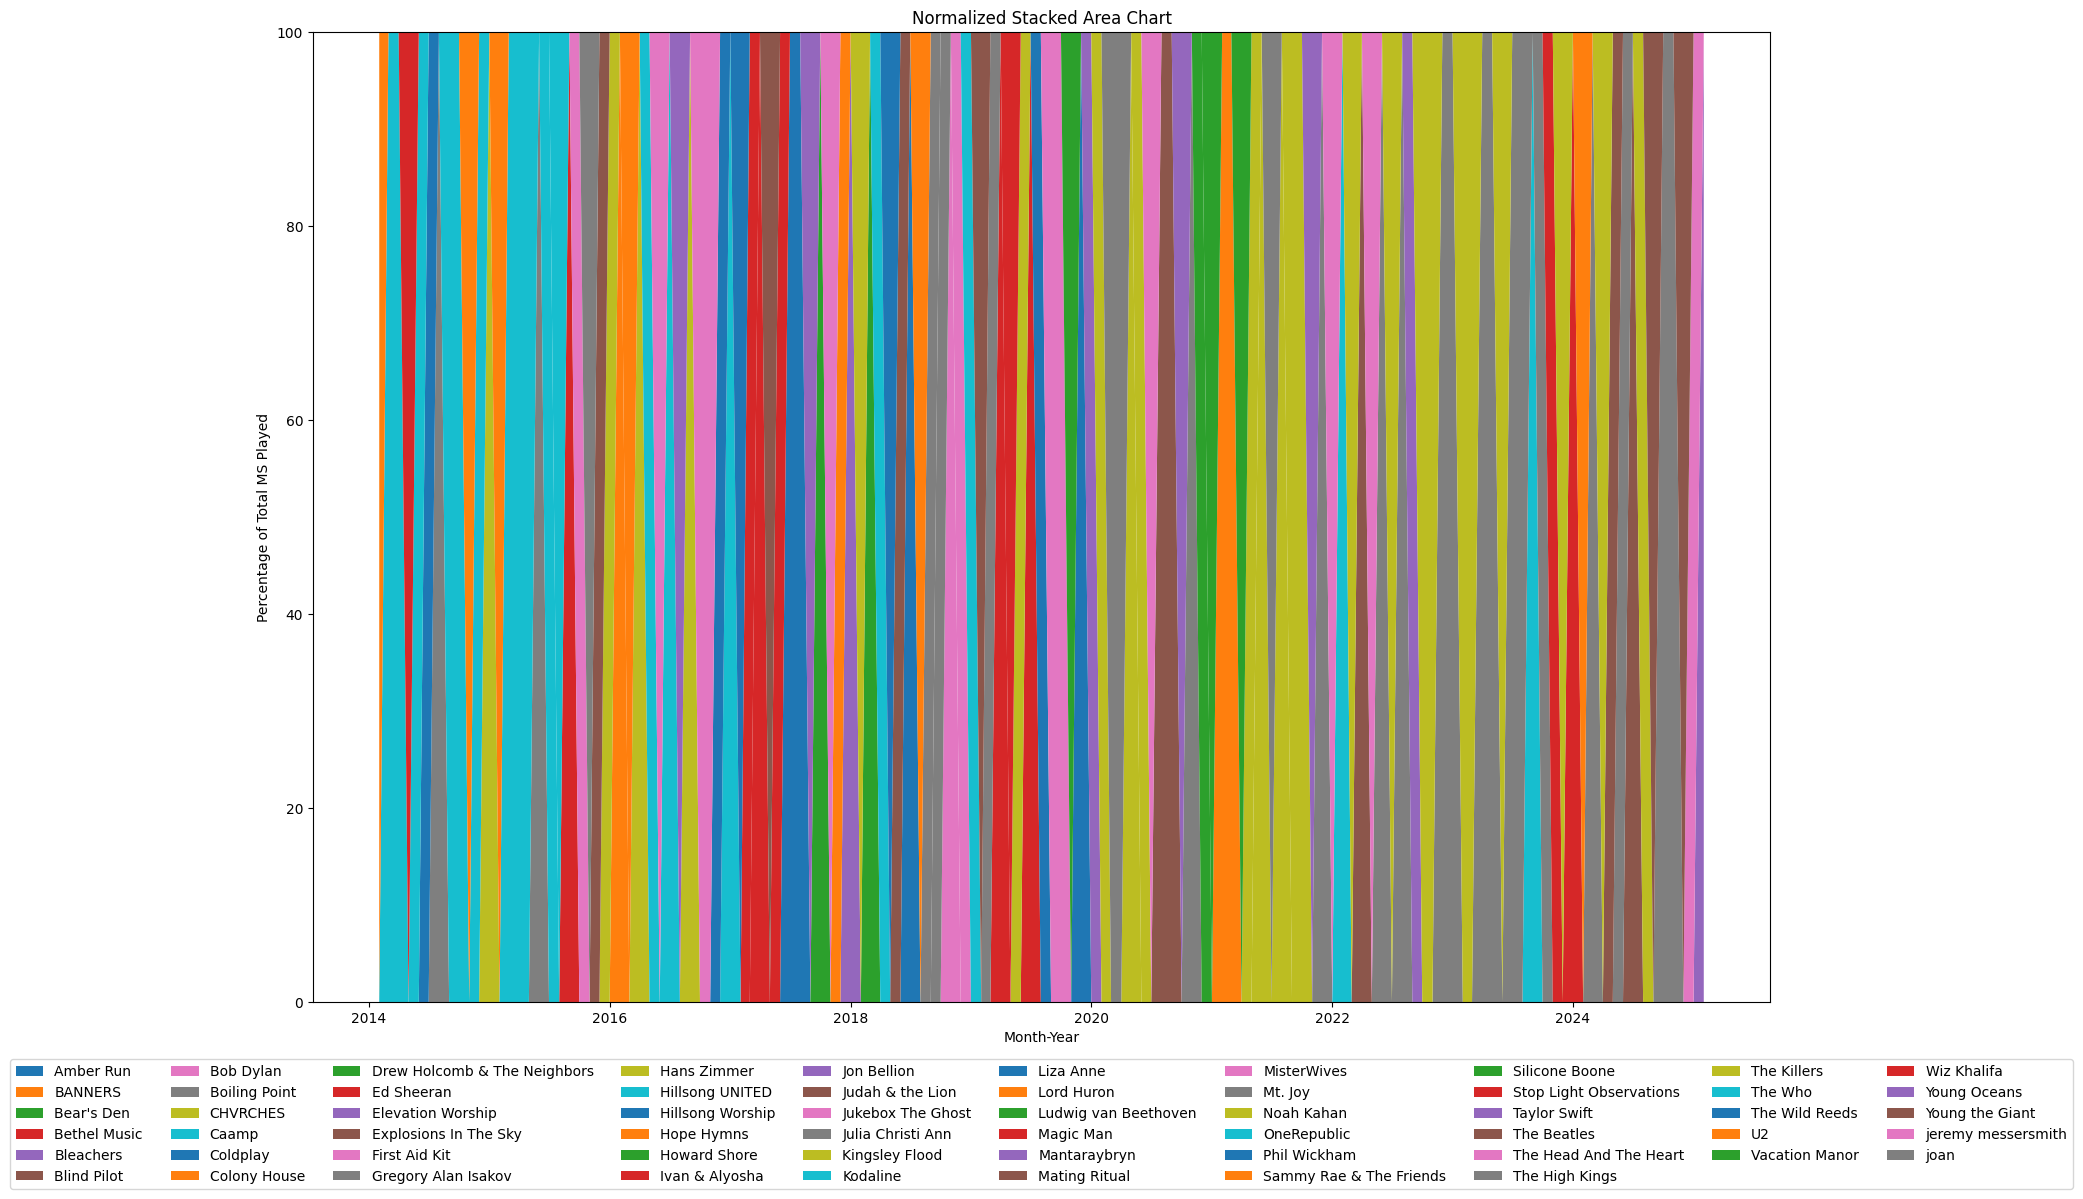

In [150]:
# 4. Pivot the data (same as before)
stacked_data = top_5_df.pivot_table(index="month_year", columns="master_metadata_album_artist_name", values="ms_played", aggfunc="sum", fill_value=0)

# 5. Calculate percentages (crucial for normalization)
stacked_data_percentage = stacked_data.apply(lambda x: x / x.sum() * 100, axis=1)

# 6. Create the plot
fig, ax = plt.subplots(figsize=(20, 12))  # Adjust figure size as needed

# 7. Stacked area chart
ax.stackplot(stacked_data_percentage.index, stacked_data_percentage.values.T, labels=stacked_data_percentage.columns)

# 8. Customize the plot
ax.set_title('Normalized Stacked Area Chart')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Percentage of Total MS Played')
ax.set_ylim(0, 100)  # Set y-axis limits to 0-100%

# 1. Place the legend outside the plot area (usually at the bottom)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -.2), ncol=10)  # Example: 3 columns

plt.tight_layout() # Prevent labels from overlapping
plt.show()